# Heuristic Player Exploration
How does the Heuristic Player perform? How does it compare to the Random Player? Can we identify any obvious weaknesses in the heuristics that could be exploited? 

**First Edit Date**: 2/15/2022<br/>
**Last Edit Date**: 2/15/2022

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from game_assets.table import Table
from game_assets.players.heuristic_player import HeuristicPlayer
from game_assets.players.random_player import RandomPlayer

In [2]:
# Plotting constants 
TITLE_FSIZE = 20
LABEL_FSIZE = 16
LEGEND_FSIZE = 16
TICK_LABEL_FSIZE = 12

## Reviewing Heuritstic Player performance
Compare Heuristic Player Performance to itself, and to a team of random agents

In [3]:
# set up a table with 4 random players
heuristic_players = [HeuristicPlayer(i) for i in range(4)]
h_table = Table(*heuristic_players)

In [4]:
# generate the scores over n rounds 
n_rounds = 1000
t0_scores = np.zeros(n_rounds)
t1_scores = np.zeros(n_rounds)
for i in range(n_rounds):
    # play a hand
    h_table.play_hand()
    # get and record current scores
    t0_scores[i], t1_scores[i] = h_table.get_scores()
    

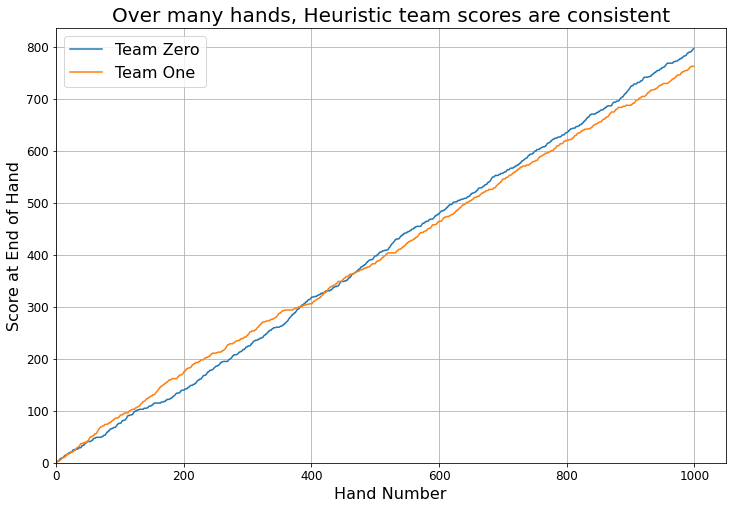

In [5]:
# plot the scores 
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.plot(t0_scores, label = "Team Zero")
ax.plot(t1_scores, label = "Team One")

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.set_xlabel("Hand Number", size = LABEL_FSIZE)
ax.set_ylabel("Score at End of Hand", size = LABEL_FSIZE)

for l in ax.get_xticklabels() + ax.get_yticklabels():
    l.set_fontsize(TICK_LABEL_FSIZE)

plt.title("Over many hands, Heuristic team scores are consistent", size = TITLE_FSIZE)
plt.legend(prop={'size': LEGEND_FSIZE})
plt.grid()
plt.show()

Unsurprisingly, scores are consistent when we pit two teams of random players against one another. Repeatedely running the above code, we see that although there is noise, average performance is consistent (an analysis similar to those performed in `random_agent_performance` could provide more evidence).

In [6]:
hr_table = Table(HeuristicPlayer(0), RandomPlayer(1), HeuristicPlayer(2), RandomPlayer(3))

In [7]:
# generate the scores over n rounds 
n_rounds = 1000
t0_scores = np.zeros(n_rounds)
t1_scores = np.zeros(n_rounds)
for i in range(n_rounds):
    # play a hand
    hr_table.play_hand()
    # get and record current scores
    t0_scores[i], t1_scores[i] = hr_table.get_scores()
    

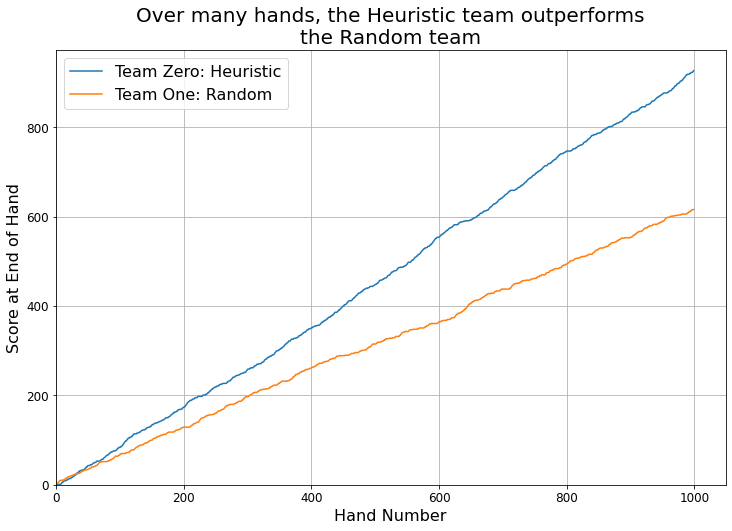

In [8]:
# plot the scores 
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.plot(t0_scores, label = "Team Zero: Heuristic")
ax.plot(t1_scores, label = "Team One: Random")

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.set_xlabel("Hand Number", size = LABEL_FSIZE)
ax.set_ylabel("Score at End of Hand", size = LABEL_FSIZE)

for l in ax.get_xticklabels() + ax.get_yticklabels():
    l.set_fontsize(TICK_LABEL_FSIZE)

plt.title("Over many hands, the Heuristic team outperforms\nthe Random team", size = TITLE_FSIZE)
plt.legend(prop={'size': LEGEND_FSIZE})
plt.grid()
plt.show()